In [81]:
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import math

In [82]:
df = pd.read_csv("sample_data/spam.csv", sep=',', encoding="latin1")
df.drop(df.columns[[2,3,4]],axis=1,inplace=True)
print(df)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [83]:
#removing extra columns, run once
df = df.drop(labels=0, axis=0)

In [84]:
df = df.rename(columns={"v1": "label", "v2": "message"})
df

,label,message
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [85]:
spam_total = 0

spam_word_counts = {}
for message in df[df["label"] == "spam"]["message"]:
    for word in message.split():
        if word in spam_word_counts:
            spam_word_counts[word] += 1
            spam_total += 1
        else:
            spam_word_counts[word] = 1

# Create a dictionary of word counts for ham messages
ham_total = 0

ham_word_counts = {}
for message in df[df["label"] == "ham"]["message"]:
    for word in message.split():
        if word in ham_word_counts:
            ham_word_counts[word] += 1
            ham_total += 1
        else:
            ham_word_counts[word] = 1

normalized_spam = spam_word_counts.copy()
normalized_ham = ham_word_counts.copy()

for word, index in enumerate(normalized_spam):
  normalized_spam[index] /= spam_total
for word, index in enumerate(ham_word_counts):
  normalized_ham[index] /= ham_total

In [97]:
# Create a function to score new text messages
def score_message(message):
    score = 0
    for word in message.split():
        if word in normalized_spam and word in normalized_ham:
            # Estimate P(spam)/P(ham) for the word
            ratio = min(max(math.log(2, normalized_spam[word] / normalized_ham[word]) + math.log(2, spam_total/ham_total), -4.3), 4.3)
            # Use data regularization to cap the maximum absolute value at 20
            score += ratio
    return score

In [98]:
# Score all messages in the corpus
scores = []
for message in df["message"]:
    scores.append(score_message(message))
print(scores)

[-1.0665727846317934, -1.2072551568561027, 0.9171196320813761, -3.3358259849323115, -7.47449664304697, -8.903243348124587, -3.2148990875322303, 2.0959709939798246, 7.188001135233226, -8.992055748618187, -0.13091349081219272, -0.6474739565209948, -7.4715153043265214, -9.6836478726269, -8.576354971966422, -0.7466376139128204, -3.386997651027875, -9.636406223156364, -4.236495931668339, -4.710806705611177, 2.1316946849400416, -9.379353525961939, -0.9258829550961352, -6.67407371904488, -8.727585468315828, -0.662568157784388, -16.348627463013038, -13.422634165117893, -5.322336585290805, -17.344165430778226, -28.63910569933754, -4.9440596677147575, -5.720446022712255, -6.603828696022898, -18.84790307746582, -5.5623300148169825, -4.076909715290238, 2.4309703434932066, -2.52546143858134, 0.8953761828915707, -27.8748568614185, 6.734274504169957, -3.8941035393087686, -7.060078342125476, 2.7572901432712187, -6.1060119374862145, -0.683767811487411, -7.59722714121086, -3.3242914342559287, -9.1572187

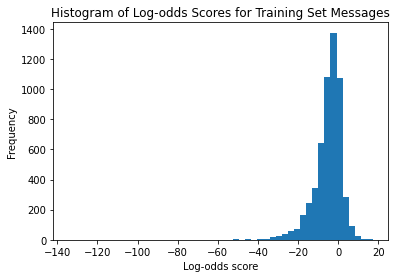

In [144]:
# Plot a histogram of log-odds scores for all messages in the training set
plt.hist(scores, bins=50)
plt.xlabel("Log-odds score")
plt.ylabel("Frequency")
plt.title("Histogram of Log-odds Scores for Training Set Messages")
plt.show()

In [135]:
#Load American text-message corpus

corpus = pd.read_csv("sample_data/test.txt", sep='\t')
corpus.drop(corpus.columns[[0,1,3]],axis=1,inplace=True)
corpus

c_incoming = corpus[corpus['type'] == 'Incoming']
c_outgoing = corpus[corpus['type'] == 'Outgoing']

In [136]:
# Score all messages in the American text-message corpus
c_incoming_scores = []
for message in c_incoming["message_body"]:
    c_incoming_scores.append(score_message(message))

c_outgoing_scores = []
for message in c_outgoing["message_body"]:
    c_outgoing_scores.append(score_message(message))

[-1.7276480709628976, -31.01609688789805, -2.2400707249771155, -1.0665727846317934, -7.008503822355173, -22.592860679204946, -0.4215605212520688, -22.94021622105208, 4.435324749101204, -1.43169842558648, -10.293713119488316, -6.953075261609775, -13.76739614816017, 2.5921654138296093, -12.698350590023212, -19.795198896543905, -19.70708948819309, 0, -7.682338701989033, -5.790677528840101, 0, 0, -6.049975270397774, 0, 0, 0, 1.5452451549204698, -3.6045463807217253, -2.0451933928263104, 0.777614213451606, 0, -5.994992912449585, -1.396591252004591, -7.0018458382197215, 9.11874395571032, -13.594485421820528, -20.426017272524398, -22.522361179398285, -8.27720531977405, -0.3546700054353082, -3.441573447280221, -16.94368414360892, -12.198866997403613, -1.1397746201852803, -1.4212427900671016, -17.148379023533106, -7.038580798834462, -0.4101528526641025, -18.330517073882124, -9.947429253022664, -22.30097963404646, 0, -7.70268148894666, -10.115899249974884, -23.81962701633787, -4.247104504197555, 

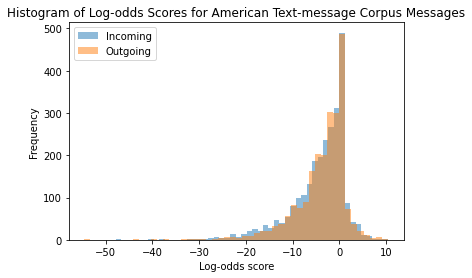

In [143]:
# Plot a histogram of log-odds scores for all messages in the American text-message corpus
plt.hist(c_incoming_scores, bins=50, alpha = .5, label = 'Incoming')
plt.hist(c_outgoing_scores, bins=50, alpha = .5, label = 'Outgoing')
plt.legend(loc="upper left")
plt.xlabel("Log-odds score")
plt.ylabel("Frequency")
plt.title("Histogram of Log-odds Scores for American Text-message Corpus Messages")
plt.show()